___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Logistic Regression Project Exercise 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [266]:
import warnings
warnings.filterwarnings('ignore')

In [267]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----

**TASK: Run the cell below to read in the data.**

In [268]:
df = pd.read_csv('heart.csv')

In [269]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [270]:
df['target'].unique()

array([1, 0])

### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

**TASK: Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [271]:
df.isnull().sum().sum()

0

In [272]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

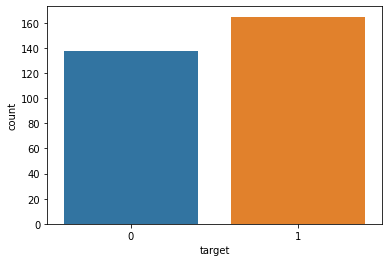

In [273]:
sns.countplot(data=df, x='target')

**TASK: Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

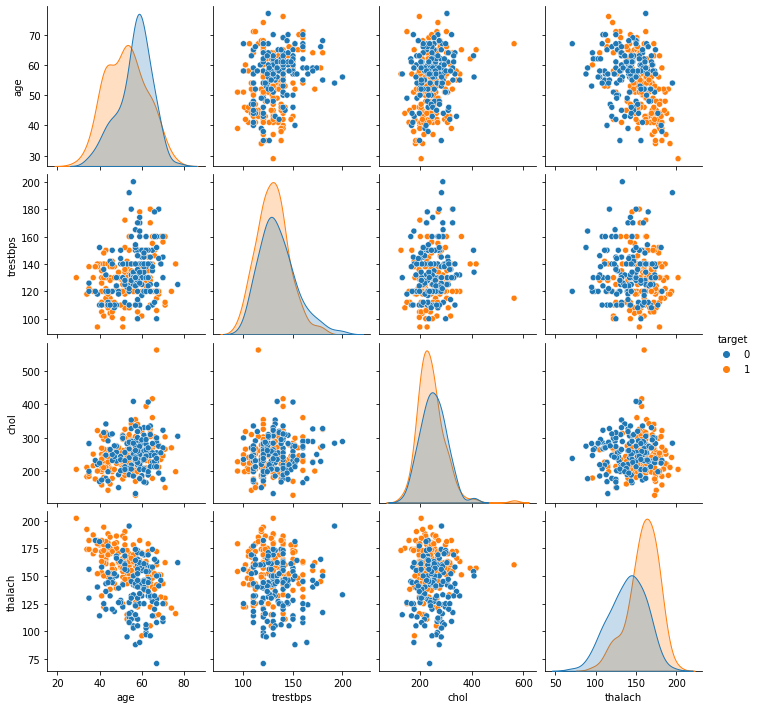

In [274]:
sns.pairplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target')

**TASK: Create a heatmap that displays the correlation between all the columns.**

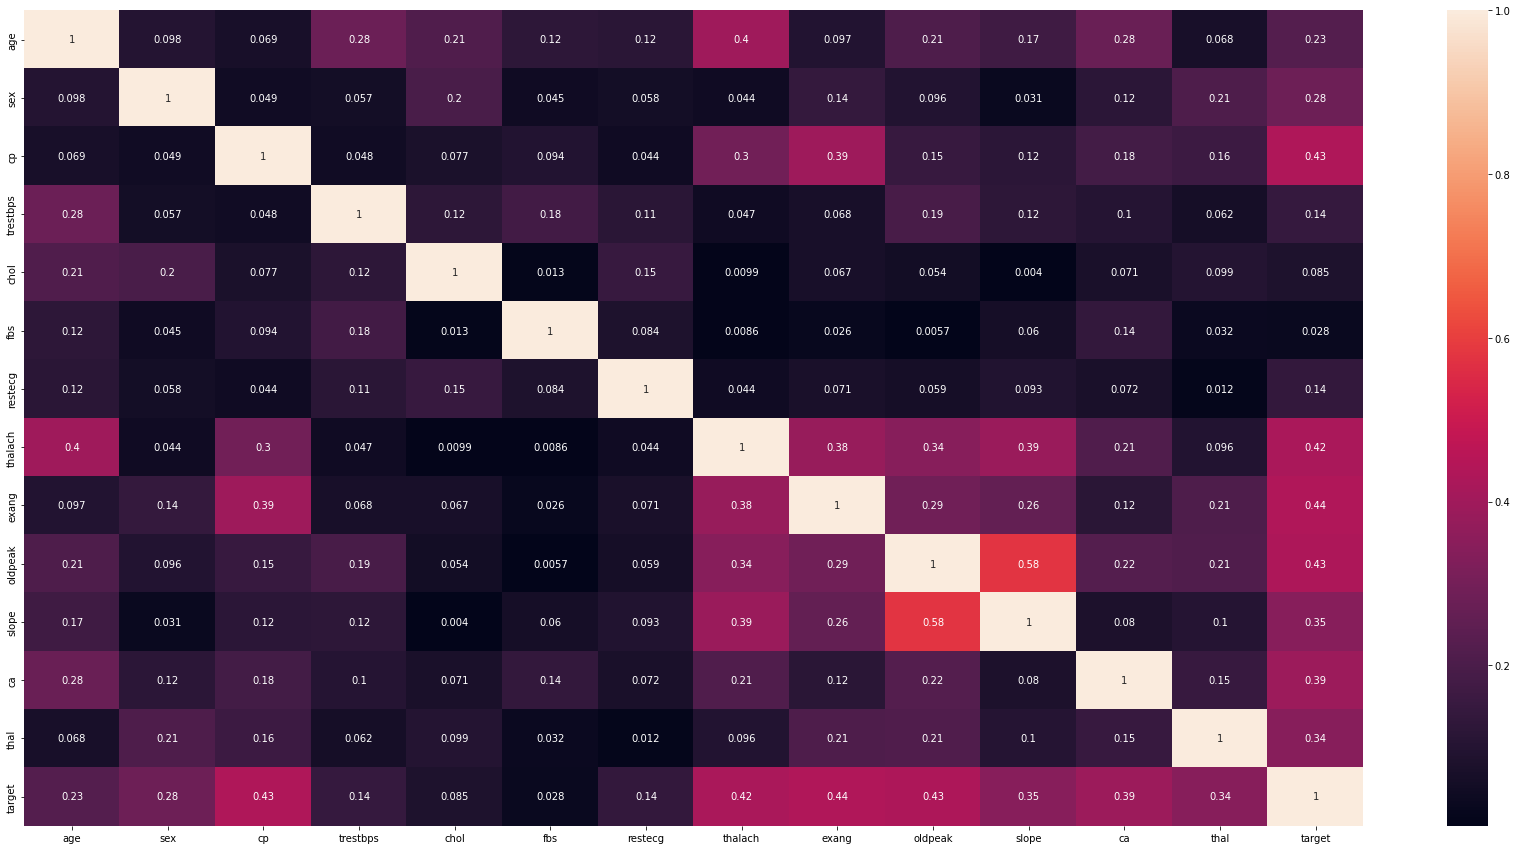

In [275]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr().abs(), annot=True)

(0.0, 1.0)

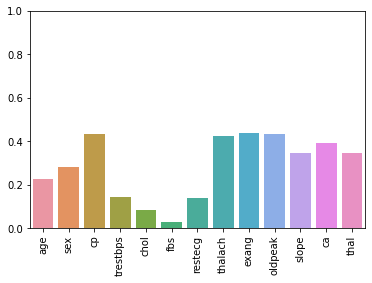

In [276]:
corr = df.corr().abs()['target'].drop('target')
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.ylim(0, 1)

----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [277]:
X = df.drop('target', axis=1)
y = df['target']

**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [278]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [279]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [280]:
param_grid = [
  {
    "penalty" : ["elasticnet"],
    "multi_class" : ['auto', 'ovr', 'multinomial'],
    "l1_ratio" : np.linspace(0,1,10),
    "C" : np.logspace(0, 10, 20),
  },
  {
    "penalty" : ["l2", "l1"],
    "multi_class" : ['auto', 'ovr', 'multinomial'],
    "C" : np.logspace(0, 10, 20),
  }
]

In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import HalvingGridSearchCV

log_model = HalvingGridSearchCV(LogisticRegression(solver="saga", max_iter=10000), param_grid, cv=5, verbose=2)

In [282]:
log_model.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[CV] END C=3.3598182862837818, l1_ratio=0.4444444444444444, multi_class=auto, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.4444444444444444, multi_class=auto, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.4444444444444444, multi_class=auto, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.4444444444444444, multi_class=auto, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.4444444444444444, multi_class=auto, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.4444444444444444, multi_class=ovr, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.4444444444444444, multi_class=ovr, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.4444444444444444, multi_class=ovr, penalty=elasticnet; total time=   0.0s
[CV] END C=3.359

HalvingGridSearchCV(estimator=LogisticRegression(max_iter=10000, solver='saga'),
                    param_grid=[{'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665...
                                {'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                                 'multi_class': ['auto', 'ovr', 'multinomial'],
                                 'penalty': ['l2', 'l1']}],
                    verbose=2)

In [283]:
log_model.best_estimator_

LogisticRegression(C=428.1332398719391, l1_ratio=0.2222222222222222,
                   max_iter=10000, multi_class='multinomial',
                   penalty='elasticnet', solver='saga')

In [284]:
log_model.best_params_

{'C': 428.1332398719391,
 'l1_ratio': 0.2222222222222222,
 'multi_class': 'multinomial',
 'penalty': 'elasticnet'}

In [285]:
pd.DataFrame(log_model.cv_results_).head()

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,param_multi_class,param_penalty,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,20,0.005457,0.005263,0.000649,0.000078,1.0,0.0,auto,elasticnet,...,0.766667,0.122474,321,1.0,0.933333,0.9375,0.9375,1.0,0.961667,0.031336
1,0,20,0.002929,0.000210,0.000639,0.000030,1.0,0.0,ovr,elasticnet,...,0.766667,0.122474,321,1.0,0.933333,0.9375,0.9375,1.0,0.961667,0.031336
2,0,20,0.003248,0.000310,0.000623,0.000028,1.0,0.0,multinomial,elasticnet,...,0.766667,0.122474,321,1.0,1.000000,1.0000,0.9375,1.0,0.987500,0.025000
3,0,20,0.003448,0.000684,0.000602,0.000082,1.0,0.111111,auto,elasticnet,...,0.766667,0.122474,321,1.0,0.933333,0.9375,0.9375,1.0,0.961667,0.031336
4,0,20,0.002629,0.000308,0.000525,0.000045,1.0,0.111111,ovr,elasticnet,...,0.766667,0.122474,321,1.0,0.933333,0.9375,0.9375,1.0,0.961667,0.031336


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

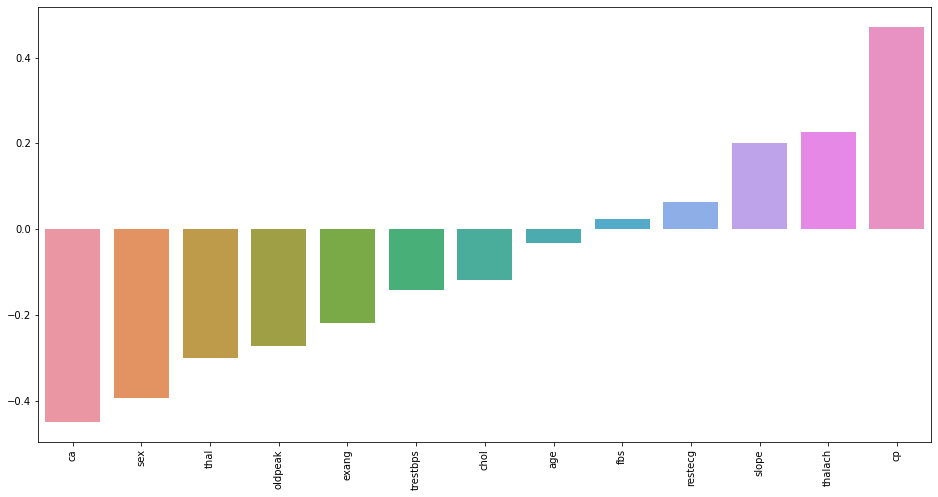

In [286]:
coefs = pd.Series(index=X.columns, data=log_model.best_estimator_.coef_.reshape(-1))
coefs = coefs.sort_values()

plt.figure(figsize=(16, 8))
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation=90)

In [287]:
log_model = log_model.best_estimator_

---------

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [288]:
log_model.score(X_train, y_train)

0.8492647058823529

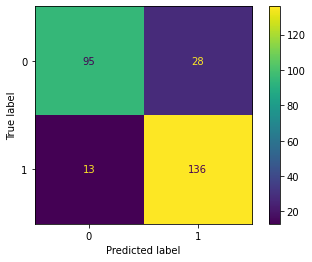

In [289]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_model, X_train, y_train)

In [290]:
from sklearn.metrics import classification_report


print(classification_report(y_test, log_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

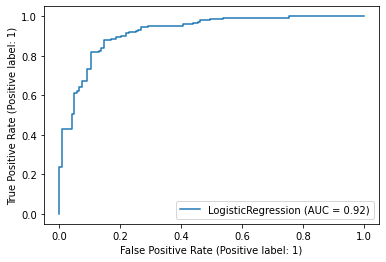

In [291]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(log_model, X_train, y_train)

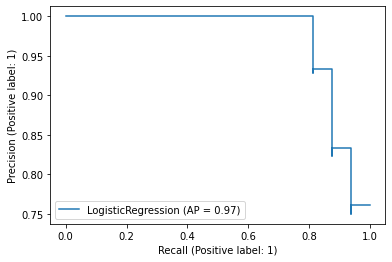

In [292]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(log_model, X_test, y_test)

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [293]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [294]:
log_model.predict(np.array(patient))

array([0])

In [295]:
log_model.predict_proba(np.array(patient))

array([[1.00000000e+00, 6.17338609e-26]])

----

## Great Job!